<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Sesiones/Sesion_11_SVM_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 11.1
por: Juliana del Valle
1. Implementar un SVM para clasificar los siguientes datasets: make_moons, make_circles y make_bloobs, para ello se deberá crear un grid search.
2. Con los mejores párametros dibujar  las fronteras de clasificación
3. Con los mejores parámetros dibujar la matriz de confusion

### Librerías y funciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics3

In [2]:
# Libraries for draw contours
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


## Moons

### Carga el Dataset

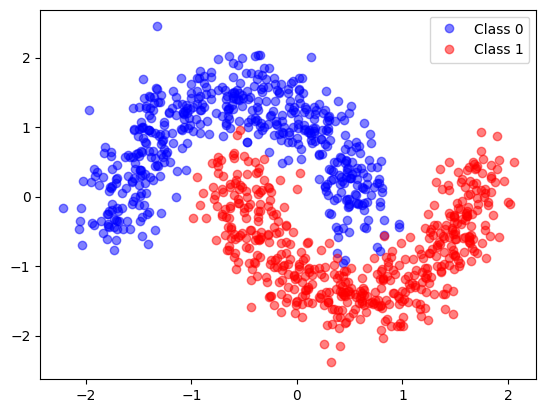

In [3]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.15, shuffle=True,  random_state=1)

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Escalado de las características

plt.plot(X[:,0][y==0],X[:,1][y==0],"bo", alpha=0.5, label="Class 0")
plt.plot(X[:,0][y==1],X[:,1][y==1],"ro", alpha=0.5, label="Class 1")
plt.legend()
plt.plot();

### Entrenamiento

In [4]:
#Grid search
parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'), 'C':[0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}


classifier = GridSearchCV(estimator = SVC(),
                          param_grid = parameters,
                          scoring='accuracy')
classifier.fit(X, y);


In [5]:
print("\nLos mejores parámetros son:", classifier.best_params_,"\nPrecisión: ",  str(classifier.best_score_))


Los mejores parámetros son: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'} 
Precisión:  0.8720000000000001


In [6]:
# Model
model = SVC(kernel='linear', C=1, gamma = 0.001)
model.fit(X, y);

### Frontera de decisión

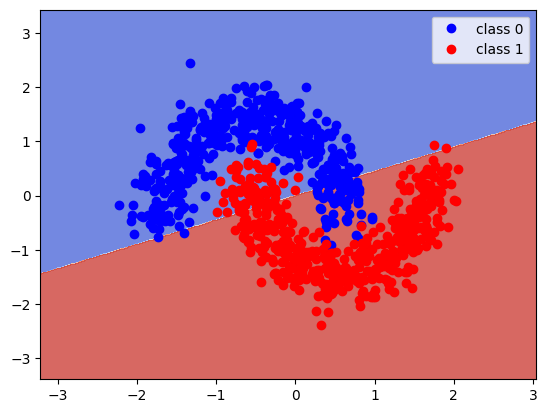

In [7]:
#Countour plot
fig, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(X[y==0][:,0],X[y==0][:,1],"bo", alpha=1, label="class 0")
plt.plot(X[y==1][:,0],X[y==1][:,1],"ro", alpha=1, label="class 1")
ax.legend()
plt.show();

### matriz de confusión

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       500
           1       0.88      0.86      0.87       500

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



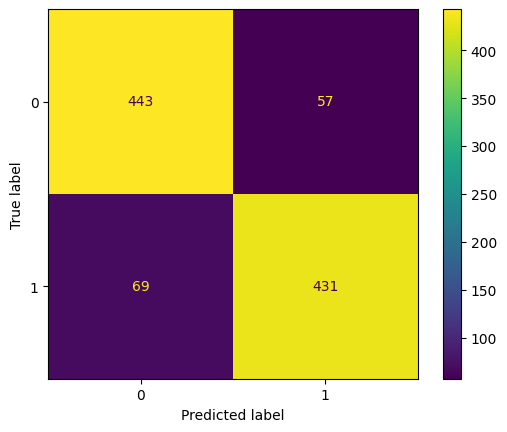

In [8]:
# Confusion matrix
y_predict = model.predict(X)
print(metrics.classification_report(y, y_predict))
cm = metrics.confusion_matrix(y, y_predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

# Circles


### Carga el Dataset

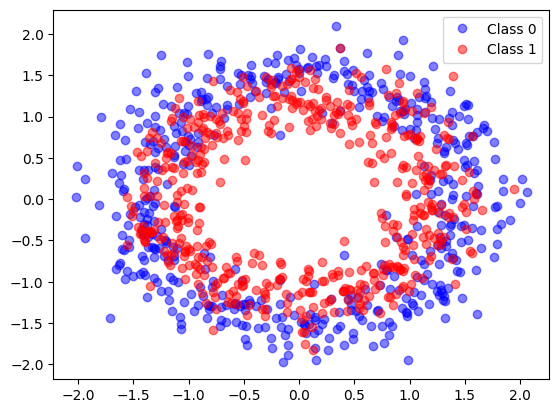

In [9]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.15, shuffle=True,  random_state=1)

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Escalado de las características

plt.plot(X[:,0][y==0],X[:,1][y==0],"bo", alpha=0.5, label="Class 0")
plt.plot(X[:,0][y==1],X[:,1][y==1],"ro", alpha=0.5, label="Class 1")
plt.legend()
plt.plot();

### Entrenamiento

In [10]:
#Grid search
parameters = {'kernel':('linear', 'rbf','poly',), 'C':[0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}


classifier = GridSearchCV(estimator = SVC(),
                          param_grid = parameters,
                          scoring='accuracy')
classifier.fit(X, y);


In [11]:
print("\nLos mejores parámetros son:", classifier.best_params_,"\nPrecisión: ",  str(classifier.best_score_))


Los mejores parámetros son: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'} 
Precisión:  0.692


In [12]:
# Model
model = SVC(kernel='rbf', C=1000, gamma = 0.001)
model.fit(X, y);

### Frontera de decisión

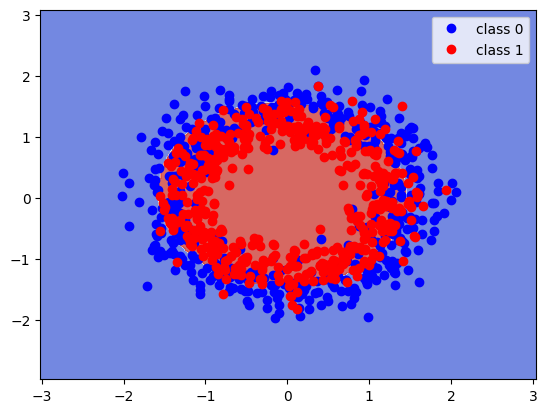

In [13]:
#Countour plot
fig, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(X[y==0][:,0],X[y==0][:,1],"bo", alpha=1, label="class 0")
plt.plot(X[y==1][:,0],X[y==1][:,1],"ro", alpha=1, label="class 1")
ax.legend()
plt.show();

### Matriz de confusión

              precision    recall  f1-score   support

           0       0.82      0.53      0.64       500
           1       0.65      0.88      0.75       500

    accuracy                           0.71      1000
   macro avg       0.74      0.71      0.70      1000
weighted avg       0.74      0.71      0.70      1000



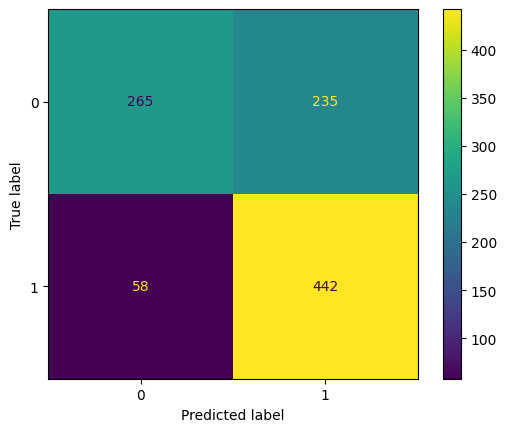

In [14]:
# Confusion matrix
y_predict = model.predict(X)
print(metrics.classification_report(y, y_predict))
cm = metrics.confusion_matrix(y, y_predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

# Bloobs


### Carga el Dataset

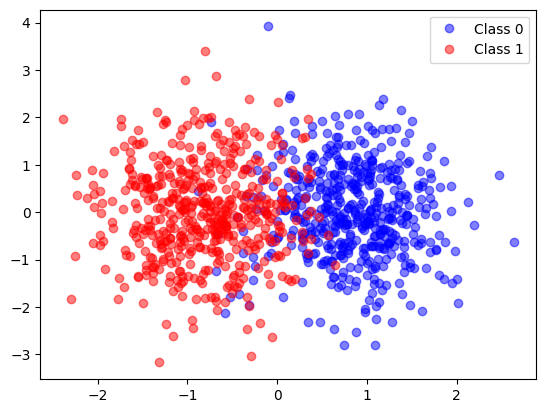

In [15]:
from sklearn.datasets import make_blobs

centers = [[2, 0], [-1, 0]]
X_blobs, y_blobs = make_blobs(n_samples=1000,  shuffle=True,  random_state=1, centers=centers)

# Escalar los datos
scaler = StandardScaler()
X_blobs = scaler.fit_transform(X_blobs)  # Escalado de las características

plt.plot(X_blobs[:,0][y_blobs==0],X_blobs[:,1][y_blobs==0],"bo", alpha=0.5, label="Class 0")
plt.plot(X_blobs[:,0][y_blobs==1],X_blobs[:,1][y_blobs==1],"ro", alpha=0.5, label="Class 1")
plt.legend()
plt.plot();

### Entrenamiento

In [16]:
#Grid search
parameters = {'kernel':('linear', 'rbf','poly',), 'C':[0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}


classifier = GridSearchCV(estimator = SVC(),
                          param_grid = parameters,
                          scoring='accuracy')
classifier.fit(X_blobs, y_blobs);


In [17]:
print("\nLos mejores parámetros son:", classifier.best_params_,"\nPrecisión: ",  str(classifier.best_score_))


Los mejores parámetros son: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'} 
Precisión:  0.931


In [18]:
# Model
model_blobs = SVC(kernel='linear', C=0.1, gamma = 0.001)
model_blobs.fit(X_blobs, y_blobs);

### Frontera de decisión

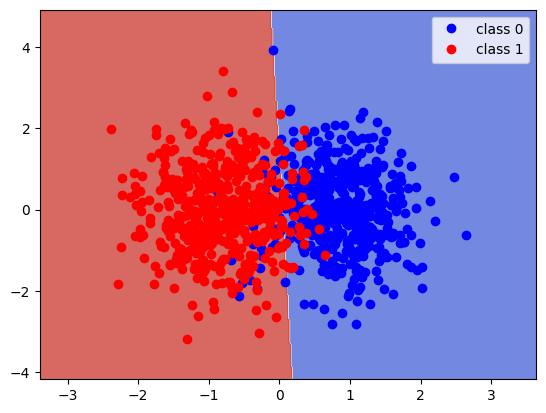

In [19]:
#Countour plot
fig, ax = plt.subplots()
X0, X1 = X_blobs[:, 0], X_blobs[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, model_blobs, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.plot(X_blobs[y_blobs==0][:,0],X_blobs[y_blobs==0][:,1],"bo", alpha=1, label="class 0")
plt.plot(X_blobs[y_blobs==1][:,0],X_blobs[y_blobs==1][:,1],"ro", alpha=1, label="class 1")
ax.legend()
plt.show();

### Matriz de confusión

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       500
           1       0.93      0.93      0.93       500

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



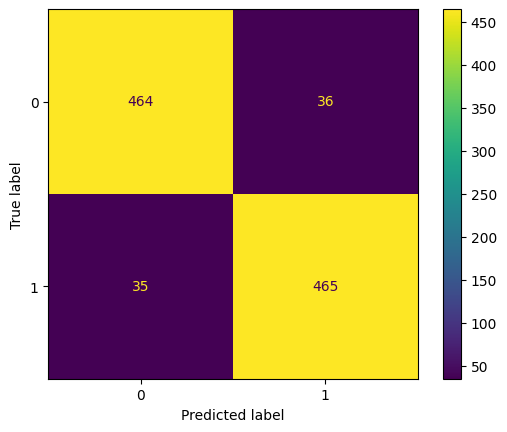

In [20]:
# Confusion matrix
y_predict = model_blobs.predict(X_blobs)
print(metrics.classification_report(y_blobs, y_predict))
cm = metrics.confusion_matrix(y_blobs, y_predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()